In [1]:
# Import statements for everything I will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import scipy.stats as stats

## Importing data and setting up different useful dataframes

In [2]:
# Function that loops through .tsv files for each season and imports them all into one dataframe
# Provide the function the list of years you want to import (I only have .tsv file for 1996-2019)
def import_into_df(year_list):

    for yr in year_list:
        # read in .tsv file
        filepath = f'data/{yr}.tsv'
        df = pd.read_csv(filepath,sep='\t')
        # add a column indicating the season ('SEASON' = year the season started, so 2019 = the 2019-2020 season)
        df['SEASON'] = yr
        
        # create output dataframe and append each additional year
        if yr == year_list[0]:
            out = df
        else:
            out = out.append(df, ignore_index=True)
    return out

In [3]:
# years to add to dataframe (reversed the order to put recent years on top)
years = list(range(2019,1995,-1))
# use the import function to import the data
nba = import_into_df(years)
nba

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,SEASON
0,OKC,OKC @ LAC,08/14/2020,L,53,103,38,106,35.8,14,...,11,37,48,18,16,5,6,29,-4,2019
1,DEN,DEN @ TOR,08/14/2020,L,48,109,36,87,41.4,16,...,9,32,41,27,16,9,11,15,-8,2019
2,LAC,LAC vs. OKC,08/14/2020,W,53,107,34,85,40.0,12,...,12,49,61,23,23,10,2,22,4,2019
3,TOR,TOR vs. DEN,08/14/2020,W,48,117,45,90,50.0,18,...,13,38,51,27,19,8,5,24,8,2019
4,HOU,HOU vs. PHI,08/14/2020,L,48,96,35,80,43.8,12,...,1,26,27,25,17,10,9,18,-38,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56627,MIA,MIA vs. ATL,11/01/1996,W,48,94,35,78,44.9,10,...,13,27,40,26,19,8,4,25,13,1996
56628,VAN,VAN vs. POR,11/01/1996,L,48,85,34,77,44.2,5,...,9,18,27,23,16,7,5,21,-29,1996
56629,MIN,MIN vs. SAS,11/01/1996,W,48,82,31,74,41.9,3,...,9,27,36,18,18,6,12,13,4,1996
56630,HOU,HOU vs. SAC,11/01/1996,W,48,96,34,87,39.1,8,...,17,28,45,25,23,20,1,19,11,1996


In [4]:
# Extracting info from MATCH UP column 

# Extracting opponent (last 3 characters of MATCH UP)
nba['OPPONENT'] = nba['MATCH UP'].str[-3:]

# Extracting home/away based on presense of "@" or 'vs.'
conditions = [
            (nba['MATCH UP'].str[4] == 'v'),
            (nba['MATCH UP'].str[4] == '@')
            ]
values = ['HOME', 'AWAY']
nba['HOME/AWAY'] = np.select(conditions, values)

#Reordering columns and excluding obsolete MATCH UP column
nba = nba[['TEAM','HOME/AWAY','OPPONENT','GAME DATE', 'W/L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-', 'SEASON']]
nba

,TEAM,HOME/AWAY,OPPONENT,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,SEASON
0,OKC,AWAY,LAC,08/14/2020,L,53,103,38,106,35.8,...,11,37,48,18,16,5,6,29,-4,2019
1,DEN,AWAY,TOR,08/14/2020,L,48,109,36,87,41.4,...,9,32,41,27,16,9,11,15,-8,2019
2,LAC,HOME,OKC,08/14/2020,W,53,107,34,85,40.0,...,12,49,61,23,23,10,2,22,4,2019
3,TOR,HOME,DEN,08/14/2020,W,48,117,45,90,50.0,...,13,38,51,27,19,8,5,24,8,2019
4,HOU,HOME,PHI,08/14/2020,L,48,96,35,80,43.8,...,1,26,27,25,17,10,9,18,-38,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56627,MIA,HOME,ATL,11/01/1996,W,48,94,35,78,44.9,...,13,27,40,26,19,8,4,25,13,1996
56628,VAN,HOME,POR,11/01/1996,L,48,85,34,77,44.2,...,9,18,27,23,16,7,5,21,-29,1996
56629,MIN,HOME,SAS,11/01/1996,W,48,82,31,74,41.9,...,9,27,36,18,18,6,12,13,4,1996
56630,HOU,HOME,SAC,11/01/1996,W,48,96,34,87,39.1,...,17,28,45,25,23,20,1,19,11,1996


In [5]:
# note that each game has two rows (one for each team). 
# At times, I will want to make direct comparisons between winners and losers of individual games,
# So I will make a 'matchups' dataframe that merges these rows

# breaking dataframe into winners and losers
win_ = nba[nba['W/L']=='W']
lose_ = nba[nba['W/L']=='L']
# appending W or L to the start of each column name to differentiate winner and loser columns
win_.columns = ['W_'+x for x in win_.columns]
lose_.columns = ['L_'+x for x in lose_.columns]

# Merging dataframes - there is no unique game id, so I am matching the losing team (W_OPPONENT and L_TEAM)
# and the game date (W_GAME DATE and L_GAME DATE), because as far as I know, teams never play twice in the same day.
matchups = pd.merge(win_, lose_,  how='inner', left_on=['W_OPPONENT','W_GAME DATE'], right_on = ['L_TEAM','L_GAME DATE'])
matchups

,W_TEAM,W_HOME/AWAY,W_OPPONENT,W_GAME DATE,W_W/L,W_MIN,W_PTS,W_FGM,W_FGA,W_FG%,...,L_OREB,L_DREB,L_REB,L_AST,L_TOV,L_STL,L_BLK,L_PF,L_+/-,L_SEASON
0,LAC,HOME,OKC,08/14/2020,W,53,107,34,85,40.0,...,11,37,48,18,16,5,6,29,-4,2019
1,TOR,HOME,DEN,08/14/2020,W,48,117,45,90,50.0,...,9,32,41,27,16,9,11,15,-8,2019
2,PHI,AWAY,HOU,08/14/2020,W,48,134,49,87,56.3,...,1,26,27,25,17,10,9,18,-38,2019
3,IND,HOME,MIA,08/14/2020,W,48,109,43,89,48.3,...,14,34,48,14,19,6,5,15,-17,2019
4,SAC,AWAY,LAL,08/13/2020,W,48,136,54,95,56.8,...,15,32,47,29,17,6,1,18,-14,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28311,CLE,AWAY,NJN,11/01/1996,W,48,90,34,72,47.2,...,11,24,35,13,22,7,7,19,-13,1996
28312,MIA,HOME,ATL,11/01/1996,W,48,94,35,78,44.9,...,10,30,40,13,24,10,7,20,-13,1996
28313,MIN,HOME,SAS,11/01/1996,W,48,82,31,74,41.9,...,9,31,40,21,18,10,4,23,-4,1996
28314,HOU,HOME,SAC,11/01/1996,W,48,96,34,87,39.1,...,8,32,40,18,27,11,8,24,-11,1996


In [6]:
# Make sure matchups has exactly half as many rows as the initial nba dataframe
print(f'Rows in nba dataframe: {len(nba)}\nRows in matchups dataframe: {len(matchups)}\n{len(nba)}/2 = {int(len(nba)/2)}')

Rows in nba dataframe: 56632
Rows in matchups dataframe: 28316
56632/2 = 28316


In [7]:
# Creating additional useful dataframes

# Separate winners and losers:
win = nba[nba['W/L']=='W']
lose = nba[nba['W/L']=='L']

# Separate home and away teams:
home = nba[nba['HOME/AWAY']=='HOME']
away = nba[nba['HOME/AWAY']=='AWAY']

# averaging the data from all games for each season
avgs = nba.groupby(['SEASON']).mean().reset_index()

## Beginning to analyze the data
Lets start with what we know anecdotally. 3-point shots have taken on a much bigger role in the NBA. Watching a game these days, it is rare to see anyone attempt a mid-range shot. Nearly all shots seem to come from either 3-point range, or right next to the hoop. At least thats the impression one would get watching the playoffs this year. Watching any sports talk show, you'll also hear about how the Warriors played a major role in ushering in this new era. So, does this impression hold true in the data?

In [8]:
# Function to plot 2 different lines for all years in our dataset, with a vertical line labeling the rise of the Warriors

def plot_lines_w_warriors_label(data1,data2,label1,label2,ylabel, ax,war_height):

    ax.axvline(2014,color='#006BB6',linewidth=6)
    ax.axvline(2014,color='#FDB927',linewidth=2)
    ax.plot(avgs['SEASON'],data1,label=label1)
    ax.plot(avgs['SEASON'],data2,label=label2)
    ax.set_xlabel('Year')
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.text(2013,war_height,'Warriors Champions',rotation=90)

Text(0.5, 1.0, 'Increase in # of 3pt attempts\nDecrease # of in 2pt attempts')

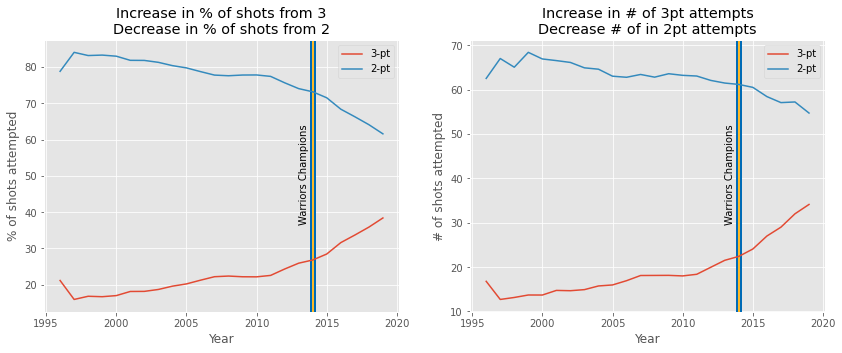

In [9]:
# Calculate % of shots taken from 3 pt range (3 point attempts divided by total shot attempts)
pct_3pt = avgs['3PA']/avgs['FGA']*100
# Calculate % of shots taken from 2 pt range (total shots - 3 point shots / total shots)
pct_2pt = (avgs['FGA']-avgs['3PA'])/avgs['FGA']*100

num_3pt = avgs['3PA']
num_2pt = (avgs['FGA']-avgs['3PA'])

fig,ax = plt.subplots(1,2, figsize=(14,5))
plot_lines_w_warriors_label(pct_3pt,pct_2pt,'3-pt','2-pt','% of shots attempted',ax[0],37)
plot_lines_w_warriors_label(num_3pt,num_2pt,'3-pt','2-pt','# of shots attempted',ax[1],30)

ax[0].set_title('Increase in % of shots from 3\nDecrease in % of shots from 2')
ax[1].set_title('Increase in # of 3pt attempts\nDecrease # of in 2pt attempts')

We see a clear increase in the percent and number of shots from 3 point range, and a corresponding decrease in the percent and number of shots from 2 point range. How does this translate to number of points scored from 2 and 3 point range?

Text(0.5, 1.0, 'No Decrease in Points Scored from 2pt range')

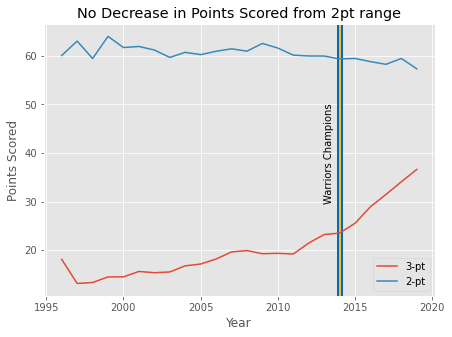

In [10]:
pts_3 = avgs['3PM']*3
pts_2 = (avgs['FGM']-avgs['3PM'])*2

fig,ax = plt.subplots(figsize=(7,5))
plot_lines_w_warriors_label(pts_3,pts_2,'3-pt','2-pt','Points Scored',ax,30)

ax.set_title('No Decrease in Points Scored from 2pt range')


Interesting! While fewer shots are taken from two point range, there is no decrease in the number of points scored from 2 point range. This must mean that 2 point shots are becoming more accurate:

Text(0.5, 1.0, 'Increased Accuracy from 2pt Range')

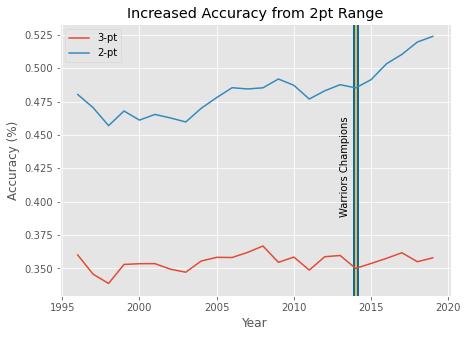

In [11]:
acc_3 = avgs['3PM']/avgs['3PA']
acc_2 = (avgs['FGM']-avgs['3PM'])/(avgs['FGA']-avgs['3PA'])

fig,ax = plt.subplots(figsize=(7,5))
plot_lines_w_warriors_label(acc_3,acc_2,'3-pt','2-pt','Accuracy (%)',ax,0.39)

ax.set_title('Increased Accuracy from 2pt Range')

And thats exactly what we see. This aligns with the changes we've seen in the game; teams mostly shoot 3-pointers or 2-pointers very close to the hoop. Inaccurate midrange 2-pointers have mostly been irradicated. So, how does all of this relate to winning and losing?

Lets start by generating some scatter plots with different colored dots for winning and losing teams to get a high level look at how winning and losing relate to different factors. 

In [12]:
# Function to make a scatter plot of any two columns
# With differnt colored dots for the winning and losing teams
# For any range of seasons
def scatter_win_lose(col1, col2, year_list, ax, marker_size, alpha):
    # Select the seasons of interest
    df = nba[nba['SEASON'].isin(year_list)]
    
    # Break the dataframe into winners and losers
    win = df[df['W/L'] == 'W']
    lose = df[df['W/L'] == 'L']
    
    # Generate scatter plots from each dataframe
    ax.scatter(lose[col1],lose[col2],label = 'Lose',alpha=alpha,s=marker_size)
    ax.scatter(win[col1],win[col2],label = 'Win',alpha=alpha,s=marker_size)
    
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(', '.join(map(str,year_list)))
    ax.legend()

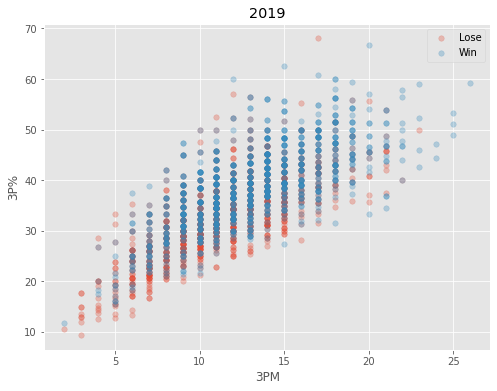

In [13]:
# Example of the function in practice
fig, ax = plt.subplots(figsize=(8,6))
scatter_win_lose('3PM','3P%',[2019],ax,30,0.3)


We can see that 3-pointers made and 3-point percentage (accuracy of 3-point shots) correlated well in the most recent season, and that winning teams (blue dots) tended to have higher values for each, as we see mostly blue dots in the upper left and mostly red dots in the lower right. Lets look at how this has varied over the years.

In [14]:
# Function that uses the previous scatter plot function to make subplots for every year in the dataset
def scatter_WL_subplots(col1,col2,marker_size,alpha):
    
    # list of all years in the dataset
    years = list(range(1996,2020))
    
    # generating a series of subplots with the right dimensins (24 plots, in 4 rows of 6 plots)
    fig, ax = plt.subplots(4,6,figsize=(18,12))
    
    # looping through the years, and plotting with the scatter_win_lose function on the appropriate subplot
    for i,year in enumerate(years):
        scatter_win_lose(col1,col2,[year],ax[i//6][i%6],marker_size,alpha)
    fig.tight_layout()

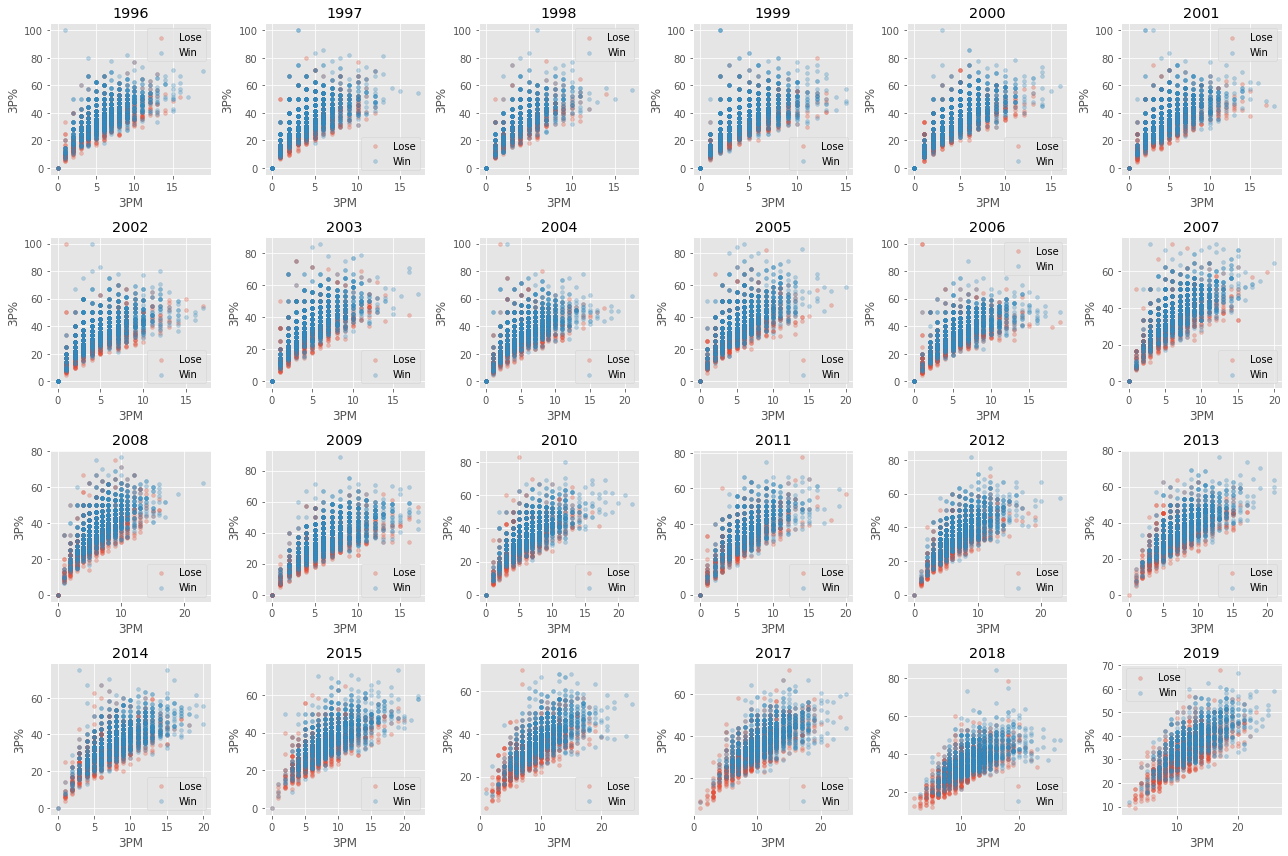

In [15]:
# testing subplots function with the same variables
scatter_WL_subplots('3PM','3P%',15,0.3)

It appears that 3-point shooting has become more important in recent years. That is, we see a clear separation of winners and losers indicated by a tail of red dots down and to the left that is not as visible in previous seasons. 

We can more directly inspect the relationship between 3-point percentage and winning/losing by using our same scatter plot function, but instead plotting 3-point percentage vs +/- (a measure of how many more points a team scored than their opponent).

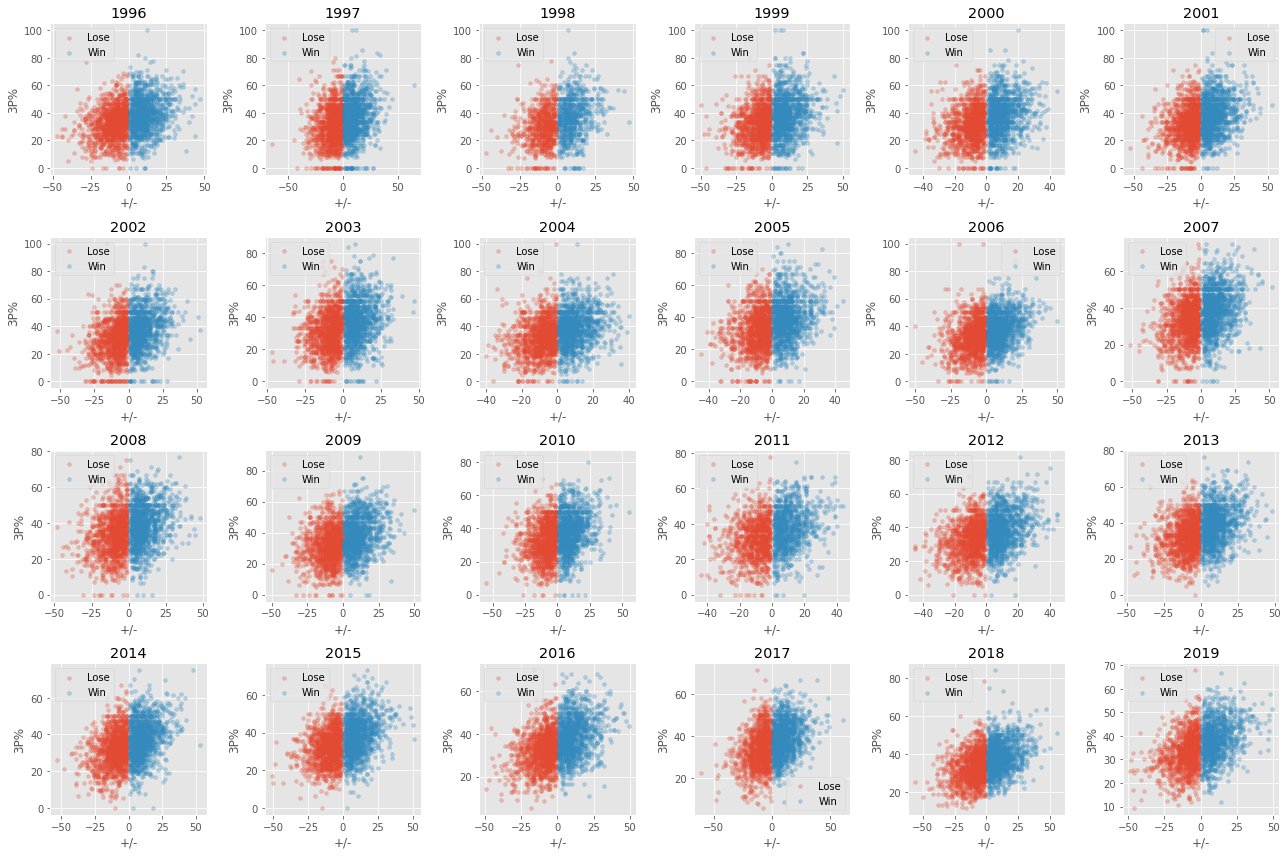

In [16]:
scatter_WL_subplots('+/-','3P%',15,0.3)

The correlation appears to be increasing, but it is never all that high. Lets check it directly:

In [17]:
# Function to plot correlation over the years in our dataset
def corr_plot(df,year_list,col1,col2,ax):
    corr_list = []
    for year in year_list:
        season = df[df.SEASON==year]
        corr = np.corrcoef(season[col1],season[col2])[0][1]
        corr_list.append(corr)
    ax.plot(year_list,corr_list)
    ax.set_xlabel('Season')
    ax.set_ylabel(f'Correlation Coefficient\n({col1} and {col2})')

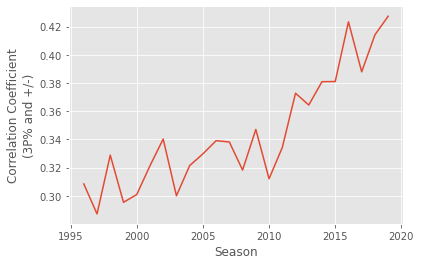

In [18]:
fig,ax=plt.subplots()
corr_plot(nba,years,'3P%','+/-',ax)

Great! we can see a clear increase in the correlation between 3P% and +/-. That is, 3P% has a stronger relatinship to winning/losing than it used to. 

## Hypothesis test 1: 
### H0: Winning teams and losing teams shoot the same 3 point percentage on average
### HA: Winning teams shoot a better 3 point percentage than losing teams

## Parallel Hypothesis test:
### H0: Winning teams and losing teams make the same number of 3 point shots on average
### HA: Winning teams make more 3 point shots

In [19]:
print('\n')
print(f'T-Test 3-point percentage, winning teams vs losing teams, full data set:\n\nT-Statistic: {stats.ttest_ind(win["3P%"],lose["3P%"])[0]}\n\np-value: {stats.ttest_ind(win["3P%"],lose["3P%"])[1]}')
print('\n\n')
print(f'T-Test 3-pointers made, winning teams vs losing teams, full data set:\n\nT-Statistic: {stats.ttest_ind(win["3PM"],lose["3PM"])[0]}\n\np-value: {stats.ttest_ind(win["3PM"],lose["3PM"])[1]}')
print('\n\n')



T-Test 3-point percentage, winning teams vs losing teams, full data set:

T-Statistic: 68.93042010909377

p-value: 0.0



T-Test 3-pointers made, winning teams vs losing teams, full data set:

T-Statistic: 41.13423874186855

p-value: 0.0





Okay, so winning teams $clearly$ shoot better 3-pt% and make more 3-pointers than losing teams, but how has it changed over the years?

Lets plot the T-statistic and p-value for the same T-test for each year in our data set

In [20]:
# function to plot p-value or t-stat for each year in our dataset
def ttest_winlose_plot_1tail(year_list, col, ax, stat = 'p',scale='linear'):
    pvals = []
    tstats = []
    for year in year_list:
        tstat, pval = stats.ttest_ind(win[win['SEASON']==year][col],lose[lose['SEASON']==year][col])
        pval = pval/2
        if tstat < 0:
            pval = 1-pval
        pvals.append(pval)
        tstats.append(tstat)
    if stat == 'p':
        ax.plot(years,pvals,linewidth=3)
        ax.set_ylabel('p-value')
    elif stat == 't':
        ax.plot(years,tstats,linewidth=3)
        ax.set_ylabel('t-statistic')
    if scale == 'log':
        ax.set_yscale('log')
    ax.set_xlabel('Year')
    
    ax.set_title(f'T-Test {col} (Winners vs Losers)')

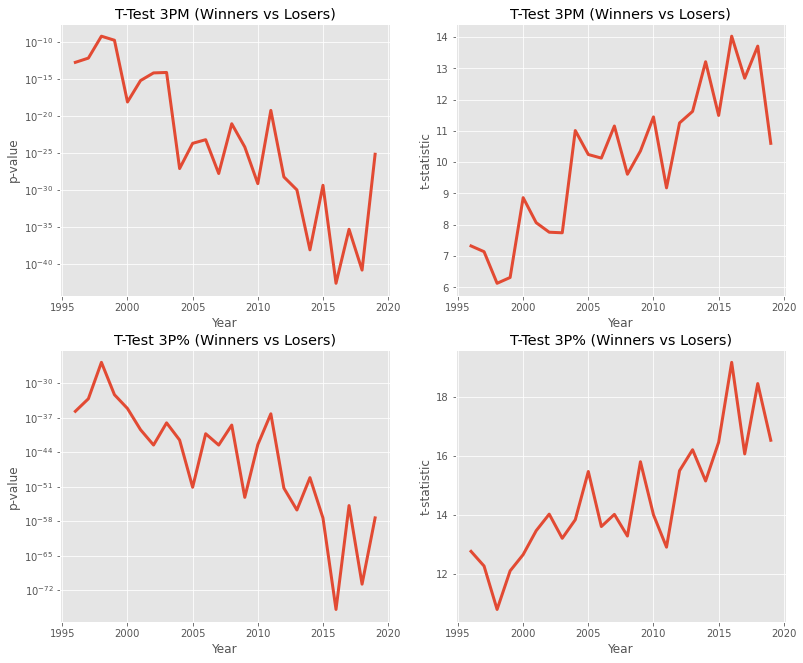

In [21]:
years = list(range(1996,2020))
fig,ax = plt.subplots(2,2,figsize=(13,11))
ttest_winlose_plot_1tail(years,'3PM',ax[0][0],'p','log')
ttest_winlose_plot_1tail(years,'3PM',ax[0][1],'t')
ttest_winlose_plot_1tail(years,'3P%',ax[1][0],'p','log')
ttest_winlose_plot_1tail(years,'3P%',ax[1][1],'t')

So, it appears that the difference between winners and losers in terms of 3 point statistics has gotten larger over the years, but how does it break down on the level of individual matchups?

We can use the 'matchups' dataframe we made earlier to look at the differences between the winning and losing teams in each game, instead of in aggregate.

In [22]:
# Adding 3-pt % diffrence and 3-pointers made difference columns to the matchups table
matchups['3P%DIFF'] = matchups['W_3P%'] - matchups['L_3P%']
matchups['3PMDIFF'] = matchups['W_3PM'] - matchups['L_3PM']

# aggregating the matchups into averages for each season to lot more easily
matchup_avgs = matchups.groupby(['W_SEASON']).mean().reset_index()

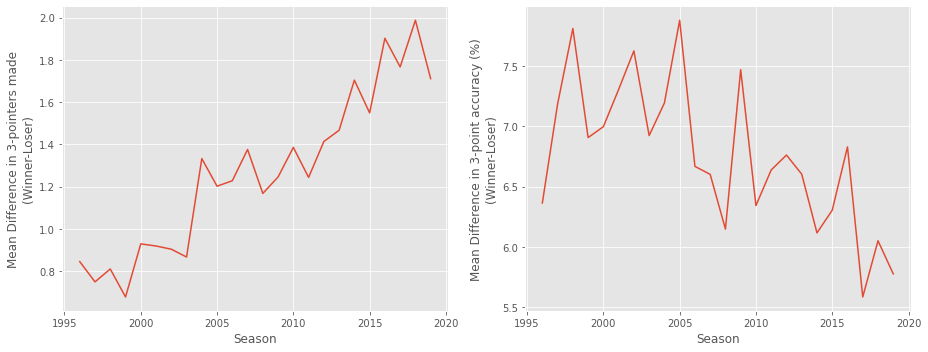

In [23]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
ax[0].plot(matchup_avgs['W_SEASON'],matchup_avgs['3PMDIFF'])
ax[0].set_ylabel('Mean Difference in 3-pointers made\n(Winner-Loser)')
ax[0].set_xlabel('Season')
ax[1].plot(matchup_avgs['W_SEASON'],matchup_avgs['3P%DIFF'])
ax[1].set_ylabel('Mean Difference in 3-point accuracy (%)\n(Winner-Loser)')
ax[1].set_xlabel('Season')
fig.tight_layout()

The difference in 3 pointers made has more than doubled, with winning teams making 0.8 more 3 pointers per game in 1996, and nearly 2 more 3 pointers per game in 2019. 

Interestingly, the mean difference in accuracy between winning and losing teams hasn't actually increased. This means that the drop in p-value that we saw earlier likely reflects a narrowing of the distributions. That is, teams are more similar in 3-pt accuracy overall, even though the distributions are more distinct according to a t-test. 

Now that we know that the gap between winners and losers in 3-pointers made has increased, it is reasonable to ask whether this is a 3-pointer specific phenomenon, or whether winning teams just beat losing teams by more on all types of scoring in the modern era. Lets look at the difference in points scored from all sources (3-pointers, 2-pointers, and free throws):

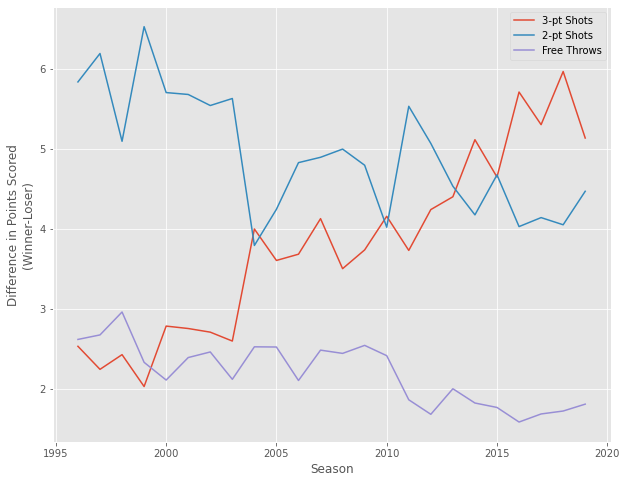

In [24]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(matchup_avgs['W_SEASON'],matchup_avgs['3PMDIFF']*3,label='3-pt Shots')
ax.plot(matchup_avgs['W_SEASON'],((matchup_avgs['W_FGM']-matchup_avgs['W_3PM'])-(matchup_avgs['L_FGM']-matchup_avgs['L_3PM']))*2,label='2-pt Shots')
#ax.plot(matchup_avgs['W_SEASON'],matchup_avgs['W_+/-'],label='Total Points')
ax.plot(matchup_avgs['W_SEASON'],matchup_avgs['W_FTM']-matchup_avgs['L_FTM'],label='Free Throws')
ax.set_ylabel('Difference in Points Scored\n(Winner-Loser)')
ax.set_xlabel('Season')
ax.legend()


We can see that this is a 3-pointer specific phenomenon. The difference in points scored on 2 pointers and free throws has remained steady, or even decreased. In recent years, 3 pointers have actually overtaken 2 pointers as the primary differntiator between winning and losing teams. 

## Part 2: breaking things down by team

While it is interesting to know how things break down on a game-by-game basis, basketball is ultimately a team sport. So, it might be more illuminating to explore how a team's 3-point shooting ability corresponds to that team's success.

In [25]:
# Function to aggregate data for each team each season
def aggregate_team_seasons(df):
    #make a copy so we don't alter our original ndataframe
    nba2 = df.copy()

    # create a boolean win column with 1 for win and 0 for a loss
    conditions = [
                (nba2['W/L'] == 'W'),
                (nba2['W/L'] == 'L')
                ]
    values = [1, 0]
    nba2['WIN'] = np.select(conditions, values)

    # create a 'GAMES' column with a 1 in each row (will give the number of games the team played per season when we eventually sum our data)
    nba2['GAMES'] = 1

    # Group by season and team, creating a single row for each team in each season with the sum of all rows for that team/season
    nba_sums = nba2.groupby(['SEASON','TEAM']).sum()

    # Clean up the data

    # use our WIN boolean and GAMES columns to calculate win percentage
    nba_sums['WIN%'] = nba_sums['WIN']/nba_sums['GAMES']

    # correct our percentage stats (3P%, FT%, FG%), which were broken by summing our data
    for stat in ['3PM','FGM','FTM']:
        nba_sums[f'{stat[0:2]}%'] = nba_sums[stat]/nba_sums[f'{stat[0:2]}A']

    # create 'per game' versions of all of our other numerical stats (divide by our GAMES column)    
    for stat in ['MIN', 'PTS', 'FGM', 'FGA','3PM', '3PA',
           'FTM', 'FTA','OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
           'BLK', 'PF', '+/-']:
        nba_sums[f'{stat}_PG'] = nba_sums[stat]/nba_sums['GAMES']

    # reset the index so it is easier to grab individual seasons/teams    
    nba_sums = nba_sums.reset_index()

    #display our new dataframe
    return nba_sums

In [26]:
# use our function and inspect the results
nba_sums = aggregate_team_seasons(nba)
nba_sums.head()

,SEASON,TEAM,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,FTA_PG,OREB_PG,DREB_PG,REB_PG,AST_PG,TOV_PG,STL_PG,BLK_PG,PF_PG,+/-_PG
0,1996,ATL,3961,7774,2812,6307,0.445854,659,1833,0.359520,...,23.841463,12.451220,28.658537,41.109756,18.987805,14.975610,8.548780,5.207317,19.402439,5.439024
1,1996,BOS,3981,8248,3066,6967,0.440075,467,1331,0.350864,...,26.817073,13.341463,26.682927,40.024390,21.853659,16.365854,9.890244,3.841463,23.353659,-7.329268
2,1996,CHH,3961,8108,2988,6342,0.471145,591,1382,0.427641,...,24.195122,11.097561,28.024390,39.121951,24.646341,14.670732,7.280488,4.256098,20.756098,1.865854
3,1996,CHI,3946,8458,3277,6923,0.473350,523,1403,0.372773,...,22.536585,15.060976,30.012195,45.073171,26.121951,13.524390,8.743902,4.048780,19.719512,10.804878
4,1996,CLE,3971,7173,2704,5972,0.452780,483,1284,0.376168,...,21.621951,11.085366,26.329268,37.414634,20.902439,14.487805,8.012195,3.841463,22.951220,1.841463


How does a teams win% relate to their 3-pt% or 3-pointers made per game?

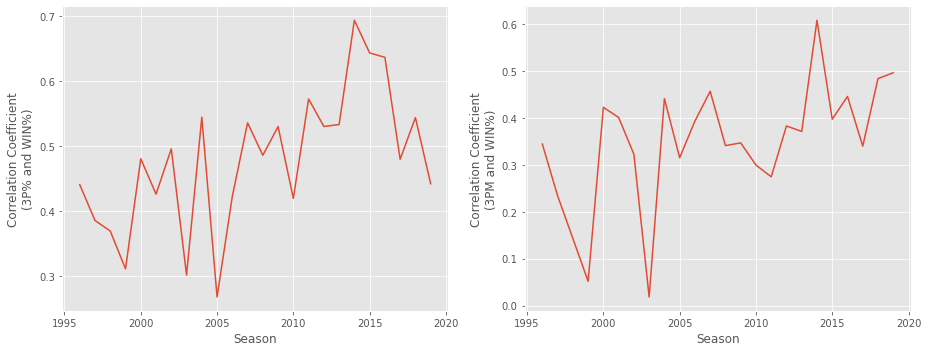

In [27]:
years = list(range(1996,2020))
fig,ax = plt.subplots(1,2,figsize=(13,5))
corr_plot(nba_sums,years,'3P%','WIN%',ax[0])
corr_plot(nba_sums,years,'3PM','WIN%',ax[1])
fig.tight_layout()

In the modern era, win% appears to correlate more strongly with 3-point % and 3-pointers made, with a substantial peak in 2014.


Lets look at the relationship between 3-point% and win% for a few years of interest.


If we're going to plot things for each team, why not make the plots pretty by building a dictionary of hex code colors for each team

In [28]:
# Building Dictionary of Team Colors 
# Team color hex codes from https://teamcolorcodes.com/nba-team-color-codes/
color_d = {}
color_d['OKC'] = ['#EF3B24','#007AC1']
color_d['DEN'] = ['#FEC524','#0E2240']
color_d['LAC'] = ['#C8102E','#1D428A']
color_d['TOR'] = ['#CE1141','#000000']
color_d['HOU'] = ['#000000','#CE1141']
color_d['PHI'] = ['#006BB6','#ED174C']
color_d['IND'] = ['#002D62','#FDBB30']
color_d['MIA'] = ['#98002E','#F9A01B']
color_d['NOP'] = ['#0C2340','#85714D']
color_d['BOS'] = ['#007A33','#BA9653']
color_d['SAS'] = ['#C4CED4','#000000']
color_d['SAC'] = ['#5A2D81','#63727A']
color_d['LAL'] = ['#552583','#FDB927']
color_d['MEM'] = ['#5D76A9','#12173F']
color_d['WAS'] = ['#002B5C','#E31837']
color_d['POR'] = ['#E03A3E','#000000']
color_d['PHX'] = ['#1D1160','#E56020']
color_d['ORL'] = ['#0077C0','#C4CED4']
color_d['BKN'] = ['#000000','#FFFFFF']
color_d['DAL'] = ['#00538C','#002B5E']
color_d['UTA'] = ['#002B5C','#00471B']
color_d['MIL'] = ['#00471B','#EEE1C6']
color_d['DET'] = ['#C8102E','#1D42BA']
color_d['NYK'] = ['#006BB6','#F58426']
color_d['CHA'] = ['#1D1160','#00788C']
color_d['ATL'] = ['#E03A3E','#C1D32F']
color_d['GSW'] = ['#006BB6','#FDB927']
color_d['MIN'] = ['#0C2340','#78BE20']
color_d['CLE'] = ['#860038','#FDBB30']
color_d['CHI'] = ['#CE1141','#FFFFFF']
color_d['NOH'] = ['#98002E','#F9A01B']
color_d['NJN'] = ['#000000','#FFFFFF']
color_d['SEA'] = ['#00653A','#FFC200']
color_d['NOK'] = ['#0C2340','#85714D']
color_d['CHH'] = ['#1D1160','#00788C']
color_d['VAN'] = ['#5D76A9','#12173F']

In [29]:
def plot_w_team_colors(year,col1,col2,ax):
    season = nba_sums[nba_sums.SEASON==year]
    for team in season['TEAM'].unique():
        t_df = season[season['TEAM']==team]
        ax.scatter(t_df[col1],t_df[col2],color=color_d[team][1],edgecolor=color_d[team][0],s=200,linewidths=4,label=team)
    #ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=10)
    #ax.set_ylim(0.31,0.42)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(str(year))

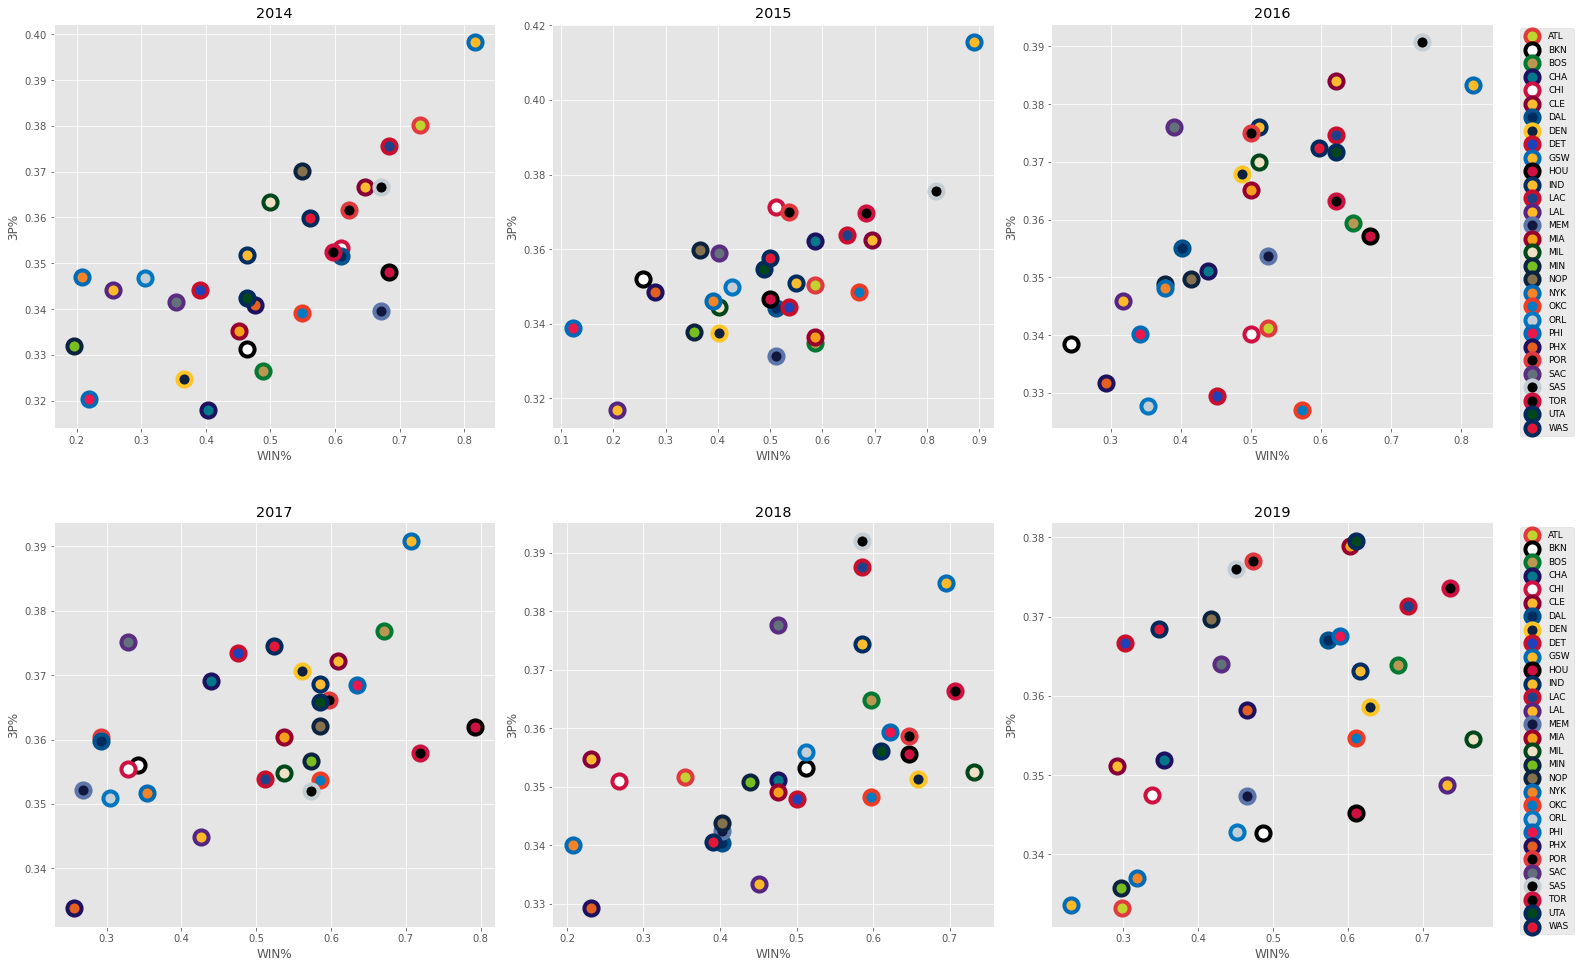

In [30]:
fig,ax = plt.subplots(2,3,figsize=(22,14))
plot_w_team_colors(2014,'WIN%','3P%',ax[0][0])
plot_w_team_colors(2015,'WIN%','3P%',ax[0][1])
plot_w_team_colors(2016,'WIN%','3P%',ax[0][2])
plot_w_team_colors(2017,'WIN%','3P%',ax[1][0])
plot_w_team_colors(2018,'WIN%','3P%',ax[1][1])
plot_w_team_colors(2019,'WIN%','3P%',ax[1][2])
ax[0][2].legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=9)
ax[1][2].legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=9)

fig.tight_layout()

Lets look at how 3-pointers made per team per game has changed over the last decade+   

In [31]:
def plot_hist_and_dist(seasons, stat, ax1, ax2,hist_range=None,hist_bins=10):
    for season in seasons:
        ax1.hist(nba_sums[nba_sums.SEASON==season][stat],bins=hist_bins,range=hist_range,label=season,alpha=0.7)
        sns.kdeplot(nba_sums[nba_sums.SEASON==season][stat],ax=ax2,label=season,bw_method=0.7)
     
    ax1.set_ylabel('# of Teams')
    ax1.set_xlabel(stat)
    
    ax1.legend(title='Season')
    ax2.legend(title='Season')

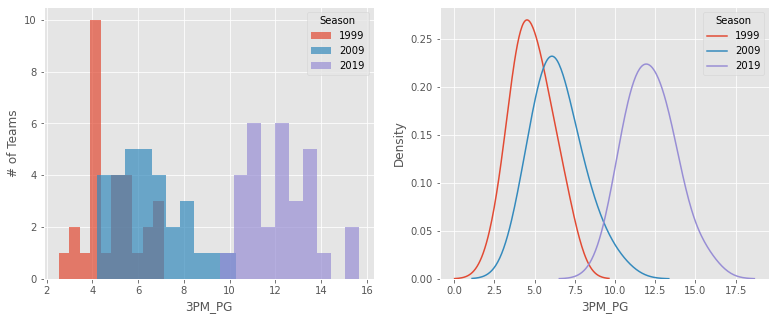

In [32]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
plot_hist_and_dist([1999,2009,2019],'3PM_PG',ax[0],ax[1])


We can see that in the 10 years from 1999 to 2009 there was some change, but there was a much larger change in the 10 years from 2009 to 2019, reflecting the change in style of play in the modern NBA.

lets look at recent years in a little more detail.

In [33]:
def plot_dist(seasons, stat, ax):
    for season in seasons:
        sns.kdeplot(nba_sums[nba_sums.SEASON==season][stat],ax=ax,label=season,bw_method=0.7)
    ax.legend(title='Season')

Text(0.5, 0, '3-Pointers Made per Game')

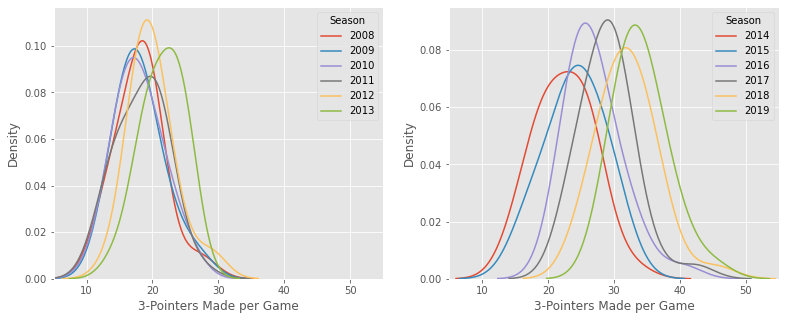

In [34]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
plot_dist(list(range(2008,2014)),'3PA_PG',ax[0])
plot_dist(list(range(2014,2020)),'3PA_PG',ax[1])
ax[0].set_xlabel('3-Pointers Made per Game')
ax[0].set_xlim(5,55)
ax[1].set_xlim(5,55)
ax[1].set_xlabel('3-Pointers Made per Game')

Data is broken into two 6 year periods, one encompassing the current era (the years starting from the first championship for the 3-pt shooting warriors). We can see that in the 6 years from 2008 to 2013 the # of 3 pointers made per game by each team stayed in a similar region, with small variations each year. Conversely, in the 6 years from 2014-2019, 3 pointers made per game has steadily increased each year. 

Text(0.5, 0, '3-Point Accuracy (%)')

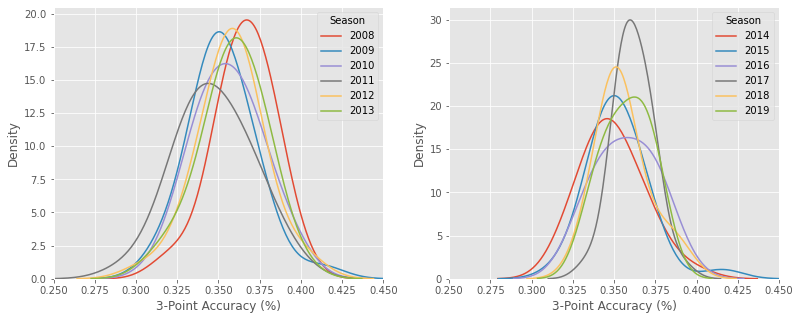

In [35]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
plot_dist(list(range(2008,2014)),'3P%',ax[0])
plot_dist(list(range(2014,2020)),'3P%',ax[1])
ax[0].set_xlabel('3-Point Accuracy (%)')
ax[0].set_xlim(0.25,0.45)
ax[1].set_xlim(0.25,0.45)
ax[1].set_xlabel('3-Point Accuracy (%)')

The same cannot be said for 3-point accuracy. Distributions appear to have gotten narrower in recent years, perhaps reflecting regression to the mean now that all teams are shooting more 3-pointers, but teams are not improving year over year.

## Hypothesis test 2: 
### H0: On average, teams from 2008-2013 made the same number of 3 pointers per game as teams from 2014-2019
### HA: Teams from 2014-2019 made more 3 pointers per game.

## Parallel Hypothesis test:
### H0: On average, teams from 2008-2013 shot 3 pointers with the same accuracy as teams from 2014-2019
### HA: Teams from 2014-2019 were more accurate than teams from 2008-2013.

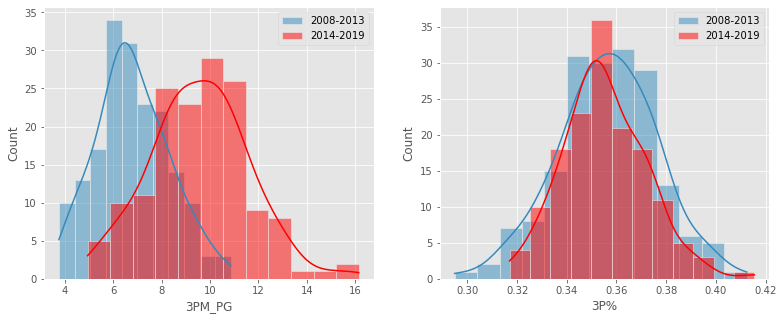

In [36]:
fig,ax=plt.subplots(1,2,figsize=(13,5))
sns.histplot(nba_sums[nba_sums.SEASON.isin(list(range(2008,2014)))]['3PM_PG'],ax=ax[0],label='2008-2013',kde=True)
sns.histplot(nba_sums[nba_sums.SEASON.isin(list(range(2014,2019)))]['3PM_PG'],ax=ax[0],label='2014-2019',kde=True,color='red')
sns.histplot(nba_sums[nba_sums.SEASON.isin(list(range(2008,2014)))]['3P%'],ax=ax[1],label='2008-2013',kde=True)
sns.histplot(nba_sums[nba_sums.SEASON.isin(list(range(2014,2019)))]['3P%'],ax=ax[1],label='2014-2019',kde=True,color='red')
ax[0].legend()
ax[1].legend()

In [38]:
shots_made_t = stats.ttest_ind(nba_sums[nba_sums.SEASON.isin(list(range(2014,2019)))]['3PM_PG'],nba_sums[nba_sums.SEASON.isin(list(range(2008,2014)))]['3PM_PG'])
accuracy_t = stats.ttest_ind(nba_sums[nba_sums.SEASON.isin(list(range(2014,2019)))]['3P%'],nba_sums[nba_sums.SEASON.isin(list(range(2008,2014)))]['3P%'])
print('\n')
print(f'T-Test 3-pointers made, 2008-2013 vs 2014-2019:\n\nT-Statistic: {shots_made_t[0]}\n\np-value: {shots_made_t[1]}')
print('\nREJECT NULL')
print('\n\n')
print(f'T-Test 3-point accuracy, 2008-2013 vs 2014-2019:\n\nT-Statistic: {accuracy_t[0]}\n\np-value: {accuracy_t[1]}')
print('\nFAIL TO REJECT NULL')



T-Test 3-pointers made, 2008-2013 vs 2014-2019:

T-Statistic: 14.198786990565969

p-value: 5.32570586703954e-36

REJECT NULL



T-Test 3-point accuracy, 2008-2013 vs 2014-2019:

T-Statistic: -0.541165084759902

p-value: 0.5887611511021893

FAIL TO REJECT NULL


NBA teams clearly make more 3 pointers in the modern era (the past 6 years) than the did in the prior 6 years. Interestingly, they do not shoot 3-pointers more accurately. Actually, given the negative T-statistic, they might shoot less accurately, though the high p-value makes that inconclusive. 